In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("lexdata_encoded.csv")
df = df.drop(columns=[col for col in df.columns if col.startswith("Country")])
df = df.drop(columns=[col for col in df.columns if col.startswith("Year")])
X = df.drop(columns=['Life expectancy ', 'Adult Mortality'])
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.neural_network import MLPRegressor

In [24]:

model = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),  
    activation='relu',
    solver='adam',
    alpha=0.001,             
    learning_rate='adaptive',
    learning_rate_init=0.00001,
    max_iter=10000,
    random_state=87,
    early_stopping=True,
    n_iter_no_change=25,
    tol=1e-5,
    verbose=True
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Iteration 1, loss = 0.25118344
Validation score: -13.918522
Iteration 2, loss = 0.23706764
Validation score: -13.091725
Iteration 3, loss = 0.22386088
Validation score: -12.309292
Iteration 4, loss = 0.21132613
Validation score: -11.568552
Iteration 5, loss = 0.19944423
Validation score: -10.861692
Iteration 6, loss = 0.18808877
Validation score: -10.183999
Iteration 7, loss = 0.17716537
Validation score: -9.530306
Iteration 8, loss = 0.16657395
Validation score: -8.900516
Iteration 9, loss = 0.15640685
Validation score: -8.287344
Iteration 10, loss = 0.14653709
Validation score: -7.699247
Iteration 11, loss = 0.13703491
Validation score: -7.133131
Iteration 12, loss = 0.12791187
Validation score: -6.587517
Iteration 13, loss = 0.11916961
Validation score: -6.067074
Iteration 14, loss = 0.11082880
Validation score: -5.569172
Iteration 15, loss = 0.10284487
Validation score: -5.093415
Iteration 16, loss = 0.09520633
Validation score: -4.640057
Iteration 17, loss = 0.08792321
Validation 

In [16]:
from sklearn.ensemble import RandomForestRegressor

R² Score: 0.9551052213631374
RMSE: 0.0374232020697844


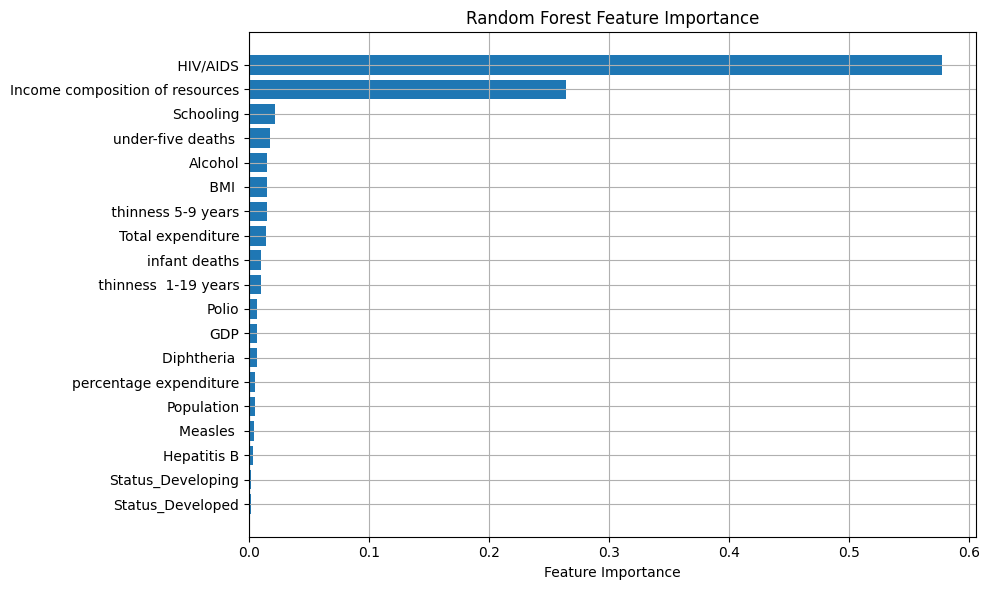

In [19]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


importances = model.feature_importances_
features = X.columns


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
import xgboost as xgb
from xgboost import XGBRegressor

R² Score: 0.9567664927936569
RMSE: 0.03672427758072099


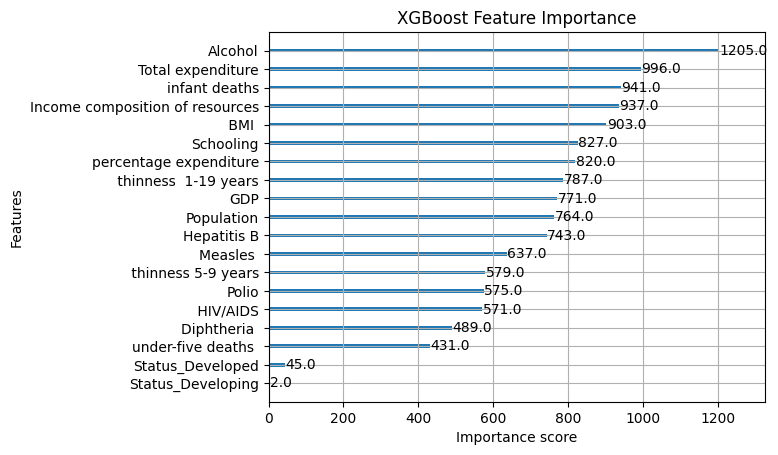

In [21]:
model = XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
model = KNeighborsRegressor(
    n_neighbors=5,      
    weights='distance', 
    algorithm='auto'    
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9144481124588801
RMSE: 0.051660407227428436
